# Filtros FIR: LP, BP, HP

## Librerias

In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.ticker as tck
import scipy as sp
import scipy.signal as sig
from scipy import io
from scipy.fftpack import fft, ifft, fftfreq

## Fase Lineal

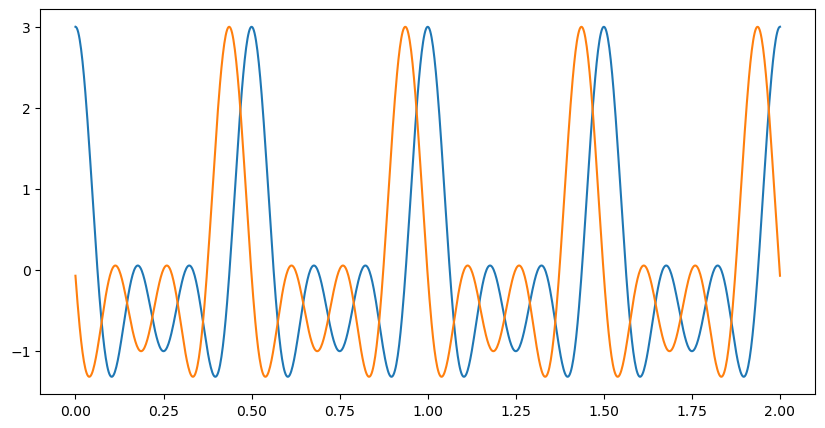

In [2]:
#Importancia de la fase lineal
t=np.linspace(0,2,1000)
f=2
y=np.cos(2*np.pi*f*t)+np.cos(2*np.pi*2*f*t)+np.cos(2*np.pi*3*f*t)
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(t,y)
D=0.8 #fase constante
#y1=np.cos(2*np.pi*f*t-D)+np.cos(2*np.pi*2*f*t-D)+np.cos(2*np.pi*3*f*t-D)
#ax.plot(t,y1)
D=0.8 #fase lineal
y2=np.cos(2*np.pi*f*t+D)+np.cos(2*np.pi*2*f*t+2*D)+np.cos(2*np.pi*3*f*t+3*D)
ax.plot(t,y2)

## Respuesta al impulso

Text(0, 0.5, 'h(t)')

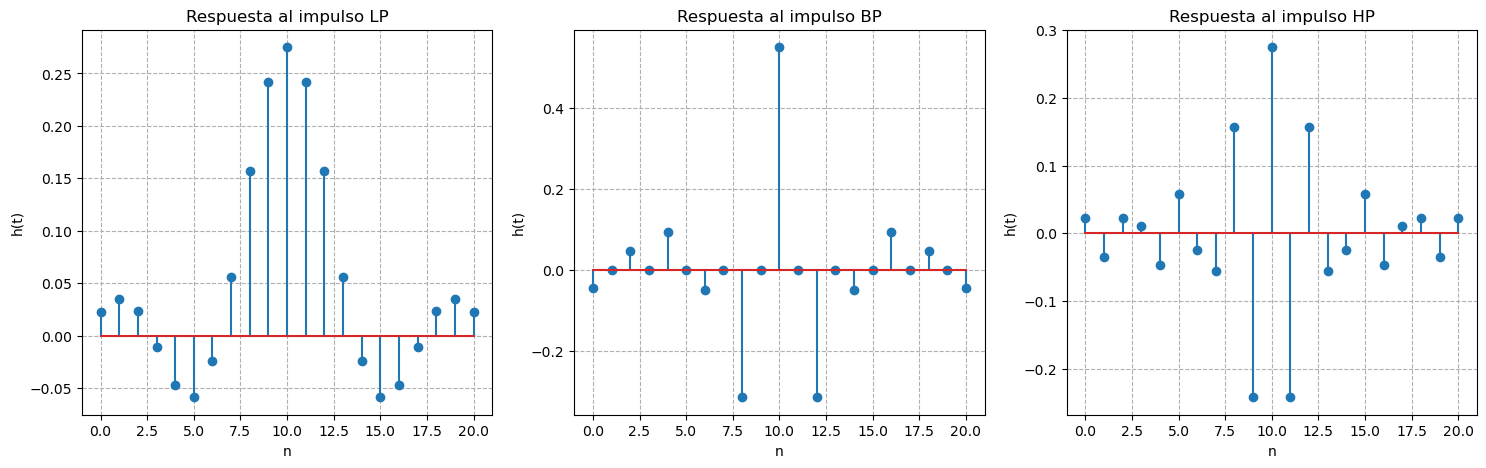

In [5]:
#Respuesta al impulso Pasa Bajos
Lh=21
N=Lh-1
n=np.array(range(Lh))
Oc=0.275*np.pi
k=(Lh-1)/2
hlp=Oc/np.pi*np.sinc(Oc/np.pi*(n-k))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
ax1.stem(hlp)
ax1.grid(linestyle='--')
ax1.set_title("Respuesta al impulso LP")
ax1.set_xlabel("n")
ax1.set_ylabel("h(t)")

# Respuesta al impulso Pasa Banda
Lh1=21
N=Lh1-1
n=np.array(range(Lh1))
Ome0=0.49*np.pi
wo=np.pi/2
k=(Lh1-1)/2
hbp=2*Oc/np.pi*np.sinc(Oc/np.pi*(n-k))*np.cos(wo*(n-k))

ax2.stem(hbp)
ax2.grid(linestyle='--')
ax2.grid(linestyle='--')
ax2.set_title("Respuesta al impulso BP")
ax2.set_xlabel("n")
ax2.set_ylabel("h(t)")

# Respuesta al impulso Pasa Altos
Lh2=21
N=Lh2-1
n=np.array(range(Lh2))
wo=np.pi
k=(Lh2-1)/2
hhp=Oc/np.pi*np.sinc(Oc/np.pi*(n-k))*np.cos(wo*(n-k))

ax3.stem(hhp)
ax3.grid(linestyle='--')
ax3.grid(linestyle='--')
ax3.set_title("Respuesta al impulso HP")
ax3.set_xlabel("n")
ax3.set_ylabel("h(t)")

## Respuesta en frecuencia: magnitud y en fase





/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_63625/3491047433.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_63625/3491047433.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()
/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_63625/3491047433.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


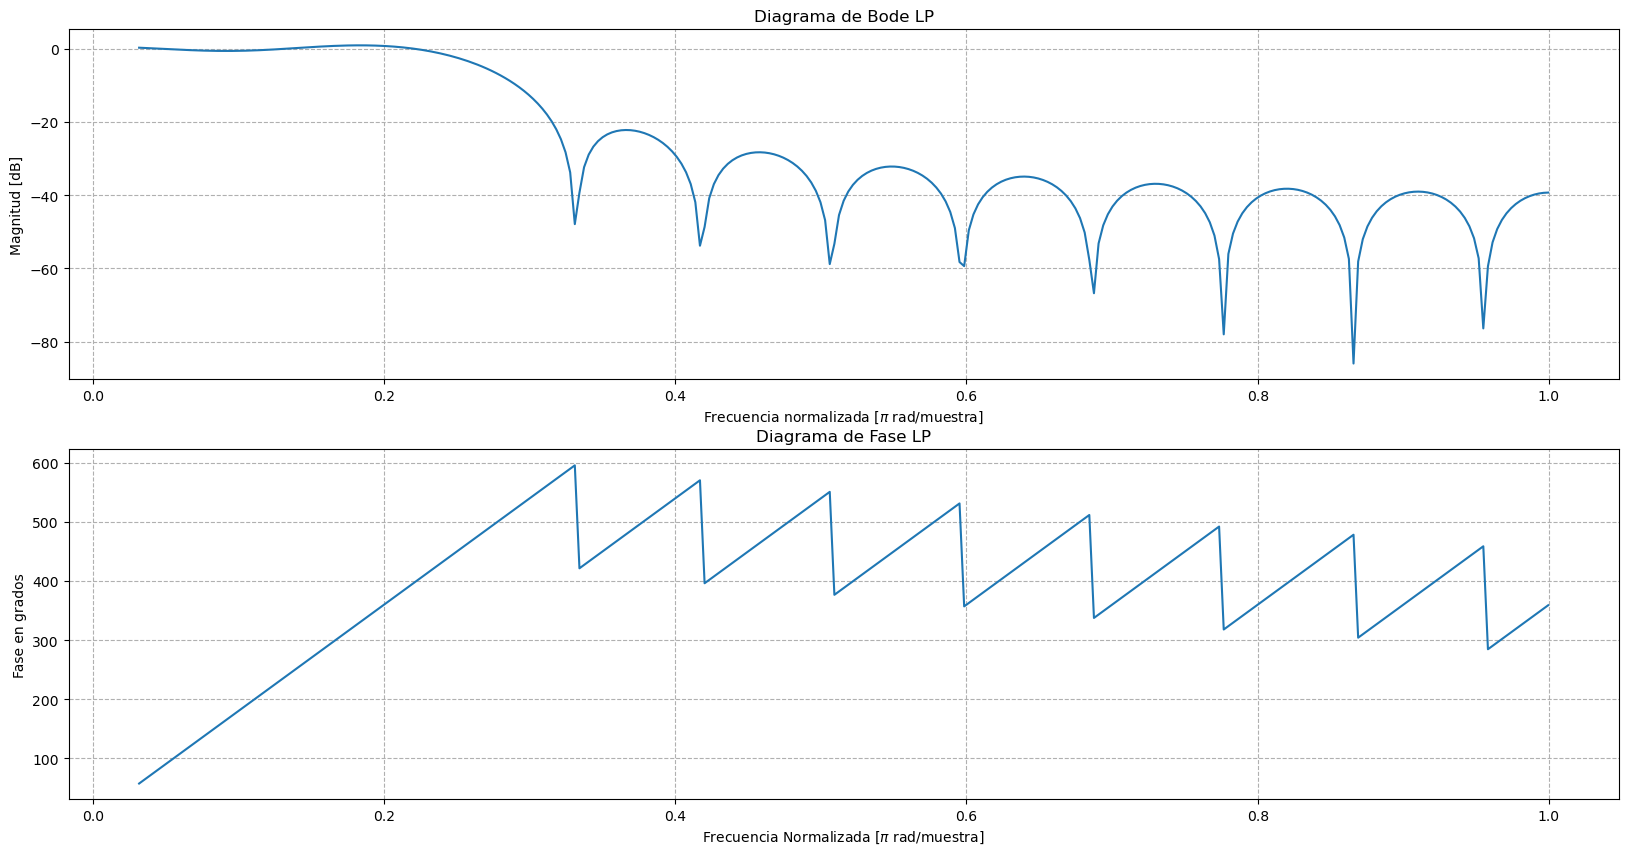

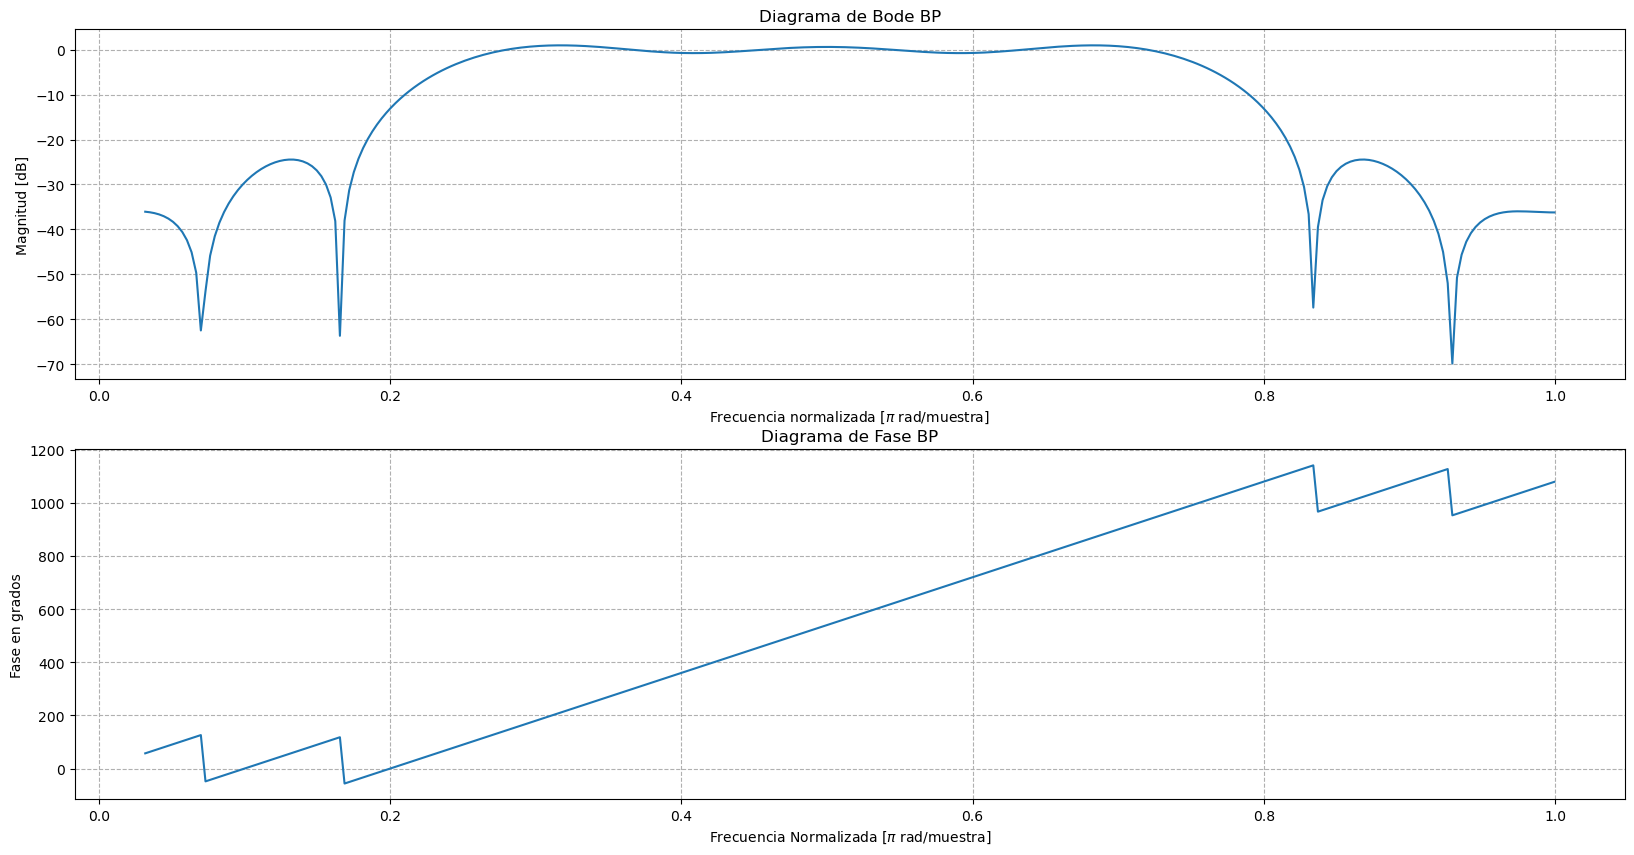

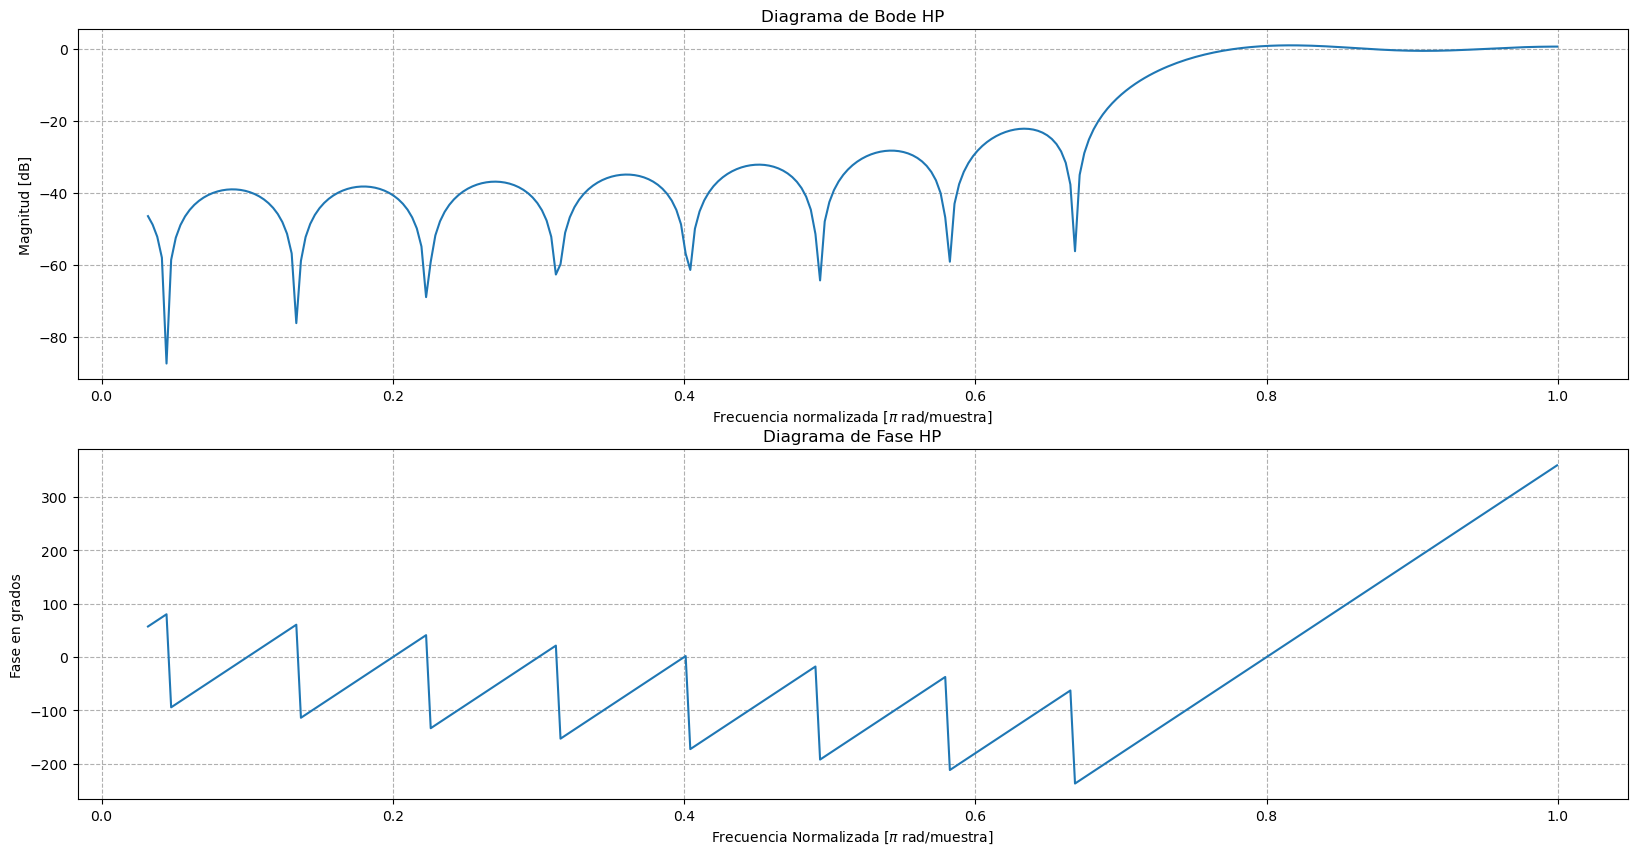

In [6]:
# LP respuesta en frecuencia dB 
s1=sig.dlti([hlp],[1])
Ome = np.arange(0.1,np.pi,0.01)
w_l1, mag_dB1, fase1 = sig.dbode(s1,w=Ome)
O1=Ome/np.pi
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
ax1.plot(O1, mag_dB1) 
ax1.grid(linestyle='--')
ax1.set_title("Diagrama de Bode LP")
ax1.set_xlabel("Frecuencia normalizada [$\pi$ rad/muestra]")  
ax1.set_ylabel("Magnitud [dB]")
#ax1.set_ylim(-2.5,2.5)
#ax1.set_xlim(0.0,0.25)

# LP respuesta en fase
ax2.plot(O1, fase1) 
ax2.grid(linestyle='--')
ax2.set_title("Diagrama de Fase LP")
ax2.set_xlabel("Frecuencia Normalizada [$\pi$ rad/muestra]")  
ax2.set_ylabel("Fase en grados")
fig1.show()

# BP respuesta en frecuencia dB 
s2=sig.dlti([hbp],[1])
w_l2, mag_dB2, fase2 = sig.dbode(s2,w=Ome)
fig2, (ax3, ax4) = plt.subplots(2, 1, figsize=(20, 10))
ax3.plot(O1, mag_dB2) 
ax3.grid(linestyle='--')
ax3.set_title("Diagrama de Bode BP")
ax3.set_xlabel("Frecuencia normalizada [$\pi$ rad/muestra]")  
ax3.set_ylabel("Magnitud [dB]")

# BP respuesta en fase 
ax4.plot(O1,fase2) 
ax4.grid(linestyle='--')
ax4.set_title("Diagrama de Fase BP")
ax4.set_xlabel("Frecuencia Normalizada [$\pi$ rad/muestra]")  
ax4.set_ylabel("Fase en grados")
fig2.show()

# HP respuesta en frecuencia dB
s3=sig.dlti([hhp],[1])
w_l3, mag_dB3, fase3 = sig.dbode(s3,w=Ome)
fig3, (ax5, ax6) = plt.subplots(2, 1, figsize=(20, 10))
ax5.plot(O1, mag_dB3) 
ax5.grid(linestyle='--')
ax5.set_title("Diagrama de Bode HP")
ax5.set_xlabel("Frecuencia normalizada [$\pi$ rad/muestra]")  
ax5.set_ylabel("Magnitud [dB]")

# HP respuesta en fase 
ax6.plot(O1,fase3) 
ax6.grid(linestyle='--')
ax6.set_title("Diagrama de Fase HP")
ax6.set_xlabel("Frecuencia Normalizada [$\pi$ rad/muestra]")  
ax6.set_ylabel("Fase en grados")
fig3.show()

/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_63625/4271718025.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_63625/4271718025.py:57: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()
/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_63625/4271718025.py:86: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


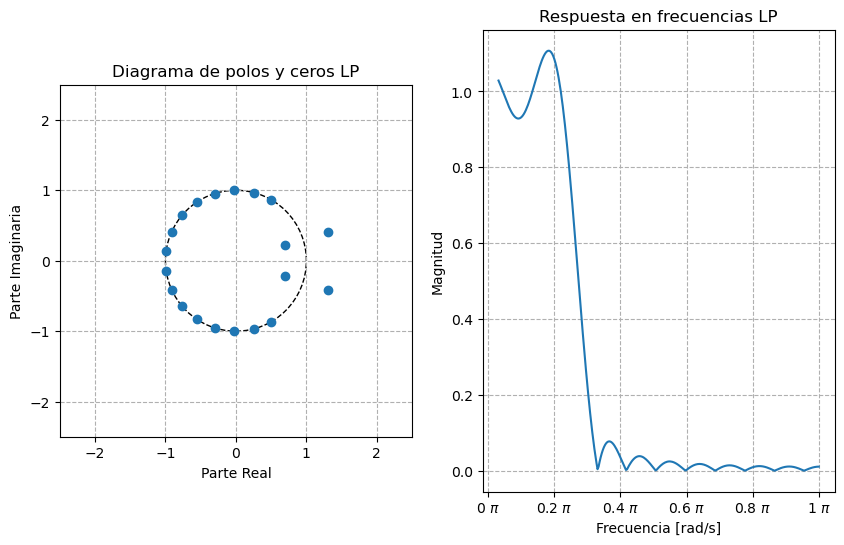

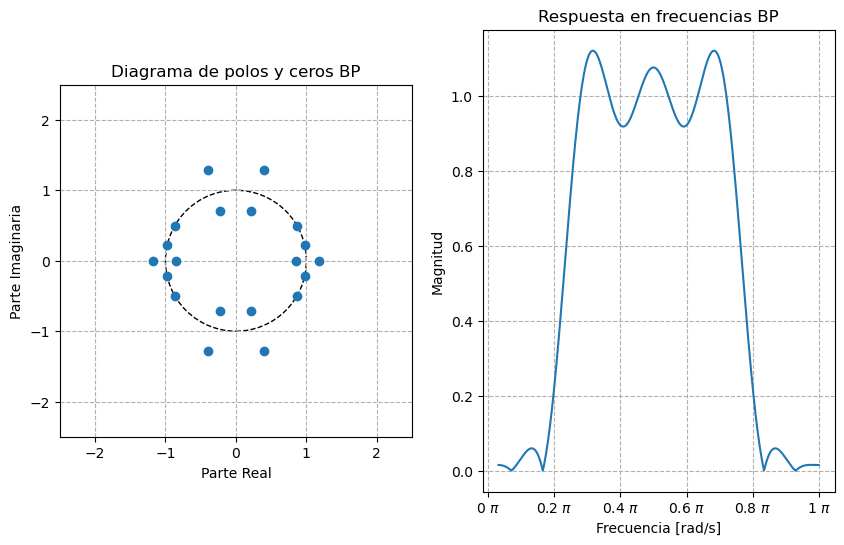

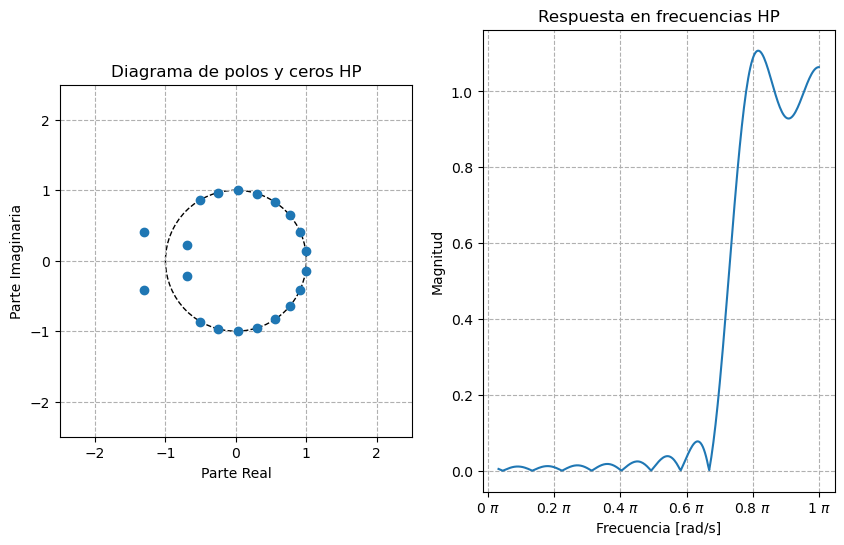

In [8]:
# Respuesta en frecuencia LP

Ome1, Hz1 = sig.dfreqresp(s1,w=Ome)
Hmag1 = abs(Hz1) #Respuesta en magnitud
fase1 = np.angle(Hz1, deg = True) # Respuesta en fase

fig1, (ax1,ax2) = plt.subplots(1, 2, figsize=(10, 6))
# Diagrama de polos y ceros LP
ax1.plot(s1.zeros.real, s1.zeros.imag, 'o')#ceros
ax1.plot(s1.poles.real, s1.poles.imag, 'x')#polos
circulo_unitario = mpl.patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax1.add_patch(circulo_unitario)
ax1.set_xlim(-2.5,2.5)
ax1.set_ylim(-2.5,2.5)
ax1.grid(linestyle='--')
ax1.set_title("Diagrama de polos y ceros LP")
ax1.set_xlabel("Parte Real")
ax1.set_ylabel("Parte Imaginaria")
ax1.set_aspect('equal')

# Respuesta en frecuencias magnitud
ax2.plot(Ome1/np.pi,Hmag1)
ax2.set_title("Respuesta en frecuencias LP")
ax2.set_xlabel("Frecuencia [rad/s]")  
ax2.set_ylabel("Magnitud")
ax2.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax2.grid(linestyle='--', which="both")
fig1.show()

# Respuesta en frecuencia BP

Ome2, Hz2 = sig.dfreqresp(s2,w=Ome)
Hmag2 = abs(Hz2) #Respuesta en magnitud
fase2 = np.angle(Hz2, deg = True) # Respuesta en fase

fig2, (ax3,ax4) = plt.subplots(1, 2, figsize=(10, 6))
# Diagrama de polos y ceros LP
ax3.plot(s2.zeros.real, s2.zeros.imag, 'o')#ceros
ax3.plot(s2.poles.real, s2.poles.imag, 'x')#polos
circulo_unitario = mpl.patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax3.add_patch(circulo_unitario)
ax3.set_xlim(-2.5,2.5)
ax3.set_ylim(-2.5,2.5)
ax3.grid(linestyle='--')
ax3.set_title("Diagrama de polos y ceros BP")
ax3.set_xlabel("Parte Real")
ax3.set_ylabel("Parte Imaginaria")
ax3.set_aspect('equal')

# Respuesta en frecuencias magnitud
ax4.plot(Ome2/np.pi,Hmag2)
ax4.set_title("Respuesta en frecuencias BP")
ax4.set_xlabel("Frecuencia [rad/s]")  
ax4.set_ylabel("Magnitud")
ax4.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax4.grid(linestyle='--', which="both")
fig2.show()

# Respuesta en frecuencia HP

Ome3, Hz3 = sig.dfreqresp(s3,w=Ome)
Hmag3 = abs(Hz3) #Respuesta en magnitud
fase3 = np.angle(Hz3, deg = True) # Respuesta en fase

fig3, (ax5,ax6) = plt.subplots(1, 2, figsize=(10, 6))
# Diagrama de polos y ceros HP
ax5.plot(s3.zeros.real, s3.zeros.imag, 'o')#ceros
ax5.plot(s3.poles.real, s3.poles.imag, 'x')#polos
circulo_unitario = mpl.patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax5.add_patch(circulo_unitario)
ax5.set_xlim(-2.5,2.5)
ax5.set_ylim(-2.5,2.5)
ax5.grid(linestyle='--')
ax5.set_title("Diagrama de polos y ceros HP")
ax5.set_xlabel("Parte Real")
ax5.set_ylabel("Parte Imaginaria")
ax5.set_aspect('equal')

# Respuesta en frecuencias magnitud
ax6.plot(Ome3/np.pi,Hmag3)
ax6.set_title("Respuesta en frecuencias HP")
ax6.set_xlabel("Frecuencia [rad/s]")  
ax6.set_ylabel("Magnitud")
ax6.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax6.grid(linestyle='--', which="both")
fig3.show()

## Ventanas

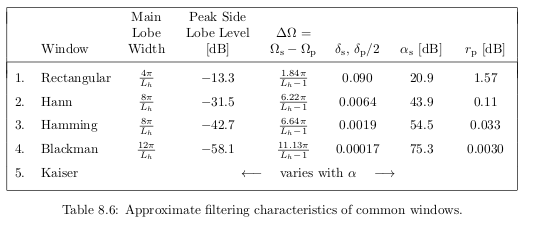

/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_63625/2049024632.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


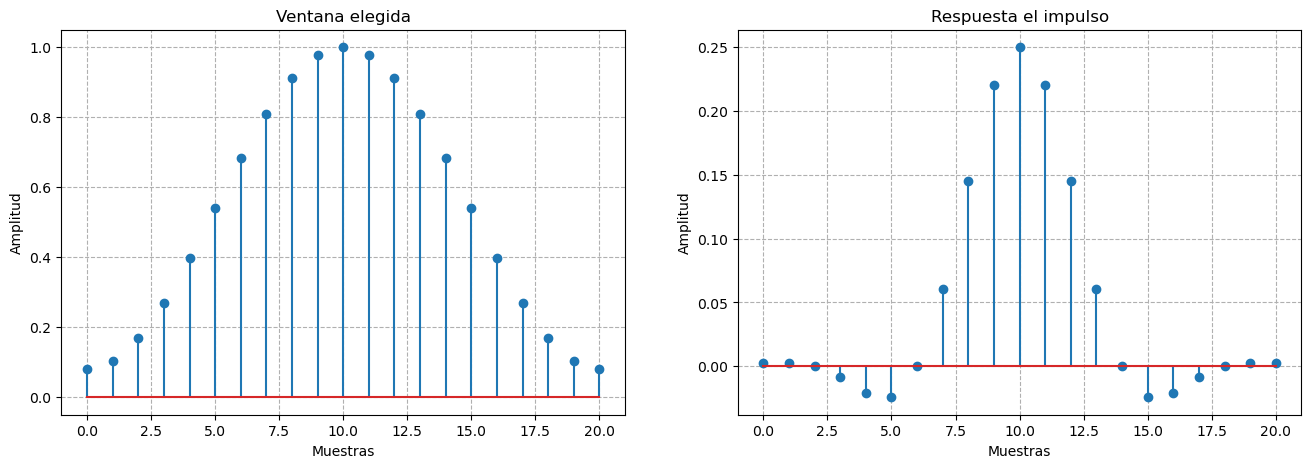

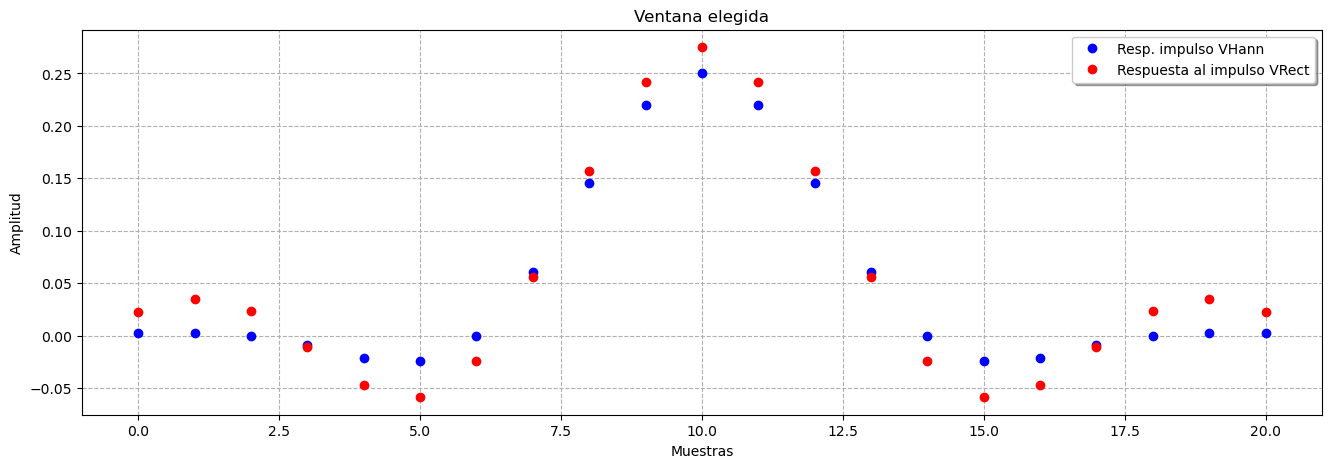

In [9]:
omega_c = np.pi/4
N = 21# longitud de la ventana
L = N-1 #orden del sistema
k = (N-1)/2
n = np.array(range(N))

# Determino la ventana a utilizar
window = sig.windows.hamming(N)


# Respuesta al impulso
h_wind = (omega_c/np.pi)*np.sinc(omega_c/np.pi*(n-k))*window

#Grafico  Ventana y Resp. Impulso

fig3, (ax4, ax5) = plt.subplots(1, 2, figsize=(16, 5))

ax4.stem(n,window)
ax4.set_title("Ventana elegida")
ax4.set_xlabel("Muestras")
ax4.set_ylabel("Amplitud")
ax4.grid(linestyle='--', which="both")#grilla punteada

(markersa, stemlinesa, baselinea) = ax5.stem(n,h_wind)
ax5.grid(linestyle='--', which="both")
ax5.set_title("Respuesta el impulso")
ax5.set_xlabel("Muestras")
ax5.set_ylabel("Amplitud")
ax5.grid(linestyle='--', which="both")#grilla punteada
fig3.show()

fig4, ax6 = plt.subplots(1, 1, figsize=(16, 5))
ax6.plot(n,h_wind,'ob',n,hlp,'or')
ax6.set_title("Ventana elegida")
ax6.set_xlabel("Muestras")
ax6.set_ylabel("Amplitud")
ax6.legend(('Resp. impulso VHann', 'Respuesta al impulso VRect'), loc='upper right', shadow=True)
ax6.grid(linestyle='--', which="both")#grilla punteada

### Respuesta en frecuencia con Ventana

/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_63625/3846617414.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig5.show()
/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_63625/3846617414.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig6.show()


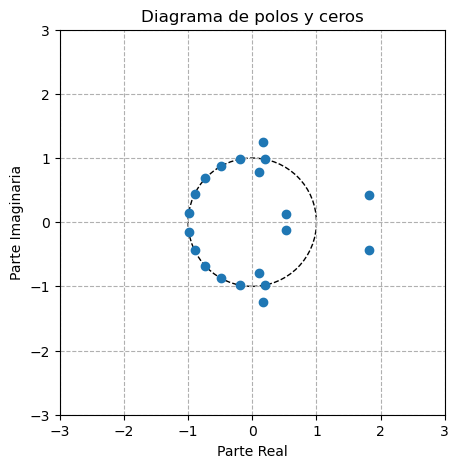

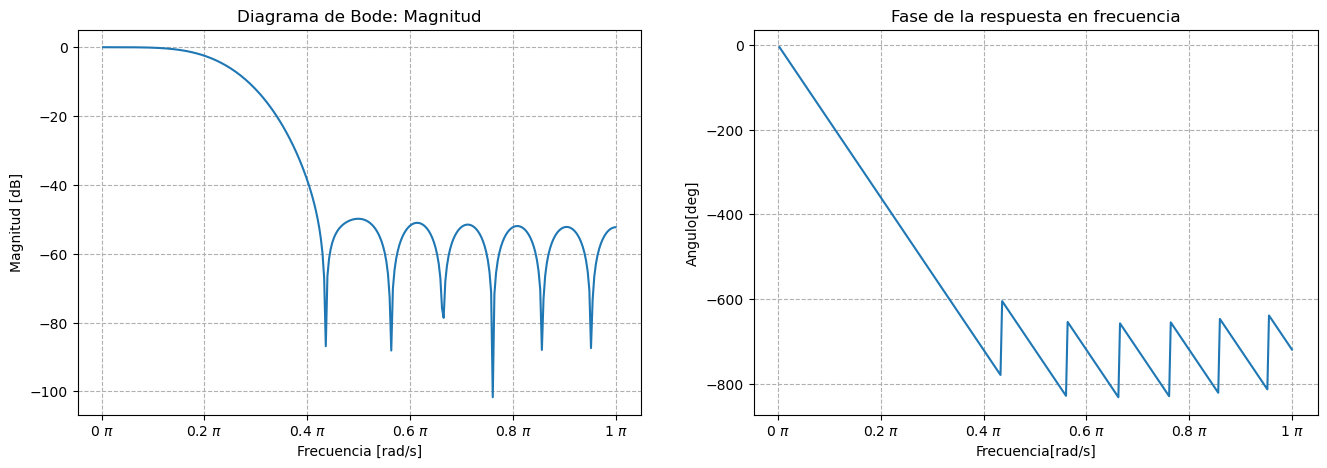

In [10]:
# Respuesta en frecuencia
#sistema
sys_wind = sig.dlti([h_wind], [1]) 

#frecuencia
Omega = np.arange(0.01,np.pi,0.01)
#f_Hz = Omega

#respuesta en frecuencia
Omega_wind_log, mag_wind_dB, fase_wind = sig.dbode(sys_wind, w=Omega)

#graficos

fig5, (ax7) = plt.subplots(1, 1, figsize=(16, 5))
#1 diagrama de polos y ceros
ax7.plot(sys_wind.zeros.real, sys_wind.zeros.imag, 'o')#ceros
ax7.plot(sys_wind.poles.real, sys_wind.poles.imag, 'x')#polos
circulo_unitario = mpl.patches.Circle((0,0), radius=1, fill=False, color='black', ls='dashed')
ax7.add_patch(circulo_unitario)
ax7.set_xlim(-3,3)#limite en parte real
ax7.set_ylim(-3,3)#limite en parte imaginaria
ax7.grid(linestyle='--')#grilla punteada
ax7.set_title("Diagrama de polos y ceros")
ax7.set_xlabel("Parte Real")
ax7.set_ylabel("Parte Imaginaria")
ax7.set_aspect('equal')
fig5.show()

fig6, (ax8, ax9) = plt.subplots(1, 2, figsize=(16, 5))
#2 magnitud
ax8.plot(Omega/np.pi,mag_wind_dB)
ax8.set_title("Diagrama de Bode: Magnitud")
ax8.set_xlabel("Frecuencia [rad/s]")  
ax8.set_ylabel("Magnitud [dB]")
ax8.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax8.grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

#3 fase
ax9.plot(Omega/np.pi,-fase_wind)
ax9.set_title("Fase de la respuesta en frecuencia")
#a3.plot(0.5/np.pi,np.angle(signal.dfreqresp(sys,w=0.5)[1][0],deg=True),'x')
ax9.set_xlabel("Frecuencia[rad/s]")
ax9.set_ylabel("Angulo[deg]")
ax9.grid(linestyle='--', which="both")#grilla punteada
ax9.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
#ax3.xaxis.set_major_locator(tck.MultipleLocator(base=0.5))
fig6.show()

In [11]:
#vuelvo a armar el LP con ventana rectangular para comparar
Lh=21
N=Lh-1
n=np.array(range(Lh))
k=(Lh-1)/2
hlp=omega_c/np.pi*np.sinc(omega_c/np.pi*(n-k))
sys_rect=sig.dlti([hlp],[1])
Ome = np.arange(0.1,np.pi,0.01)
w_rect, mag_rect, fase_rect = sig.dbode(s1,w=Omega)

### Comparacion de ventana rectangular con otra ventana

/var/folders/kc/w9qf361n0lv2428kf159qtqm0000gn/T/ipykernel_63625/1473630891.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig7.show()


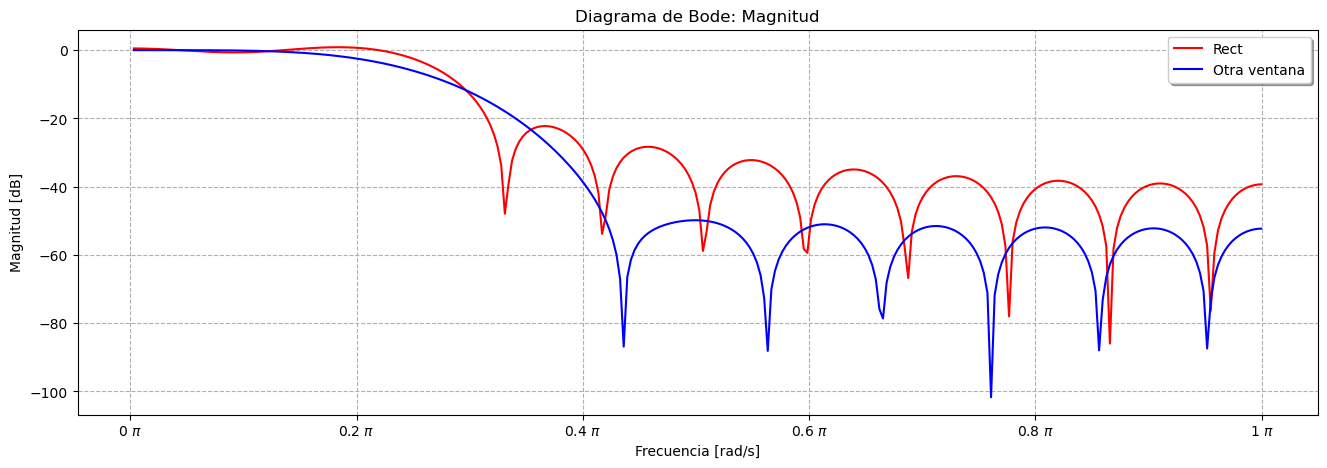

In [12]:
fig7, ax10 = plt.subplots(1, 1, figsize=(16, 5))

ax10.plot(Omega/np.pi,mag_rect,'r',Omega/np.pi,mag_wind_dB,'b')
#ax10.plot(Omega/np.pi,mag_wind_dB,'b')
ax10.legend(('Rect','Otra ventana'), loc='upper right', shadow=True)
ax10.set_title("Diagrama de Bode: Magnitud")
ax10.set_xlabel("Frecuencia [rad/s]")  
ax10.set_ylabel("Magnitud [dB]")
ax10.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax10.grid(linestyle='--', which="both")#grilla punteada para escala logaritmica

fig7.show()

## Construcción manual de la ventana

Text(0, 0.5, 'w(t)')

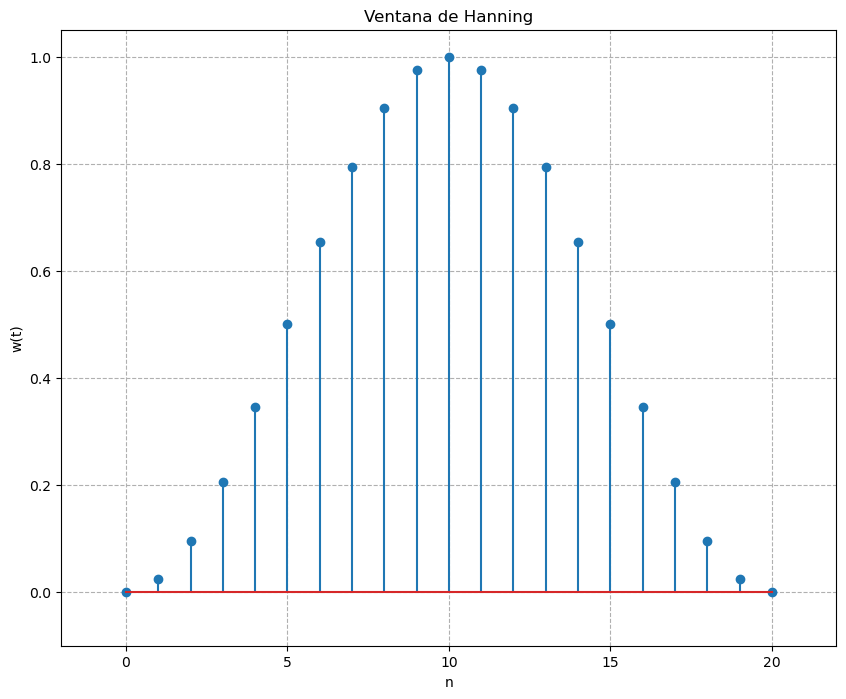

In [13]:
#Ventana de Hanning
hanning=0.5-0.5*np.cos(2*np.pi*n/(Lh-1))
fig,ax11=plt.subplots(1,1,figsize=(10,8))
ax11.stem(hanning)
ax11.set_xlim(-2,N+2)
ax11.set_ylim(-0.1,1.05)
ax11.grid(linestyle='--')
ax11.set_title("Ventana de Hanning")
ax11.set_xlabel("n")
ax11.set_ylabel("w(t)")

# Diseño del filtro FIR


## Pasa Bajos LP

In [14]:
#Parametros del filtro
fs=4200
fa=1200
fp=1000
rp=20*np.log10(1.1)
Aa=20*np.log10(1/400)
Op=fp/fs*2*np.pi
Oa=fa/fs*2*np.pi
Oc=(Op+Oa)/2

print('PARAMETROS DEL FILTRO')
print('Atenuación=',round(Aa,2))
print('Omega de paso=',round(Op,2))
print('Omega de paso=',round(Op/np.pi,2))
print('Omega de rechazo=',round(Oa,2))
print('Omega de rechazo=',round(Oa/np.pi,2))
print('Ripple=',round(rp,3))
print('Banda de transición=',round((Oa-Op),2))
print('Banda de transición=',round((Oa-Op)/np.pi,2))
print('Omega de corte=',round(Oc,2))
print('Omega de corte=',round(Oc/(np.pi),2)) 

PARAMETROS DEL FILTRO
Atenuación= -52.04
Omega de paso= 1.5
Omega de paso= 0.48
Omega de rechazo= 1.8
Omega de rechazo= 0.57
Ripple= 0.828
Banda de transición= 0.3
Banda de transición= 0.1
Omega de corte= 1.65
Omega de corte= 0.52


### Construimos el Filtro

Text(0, 0.5, 'Magnitud [dB]')

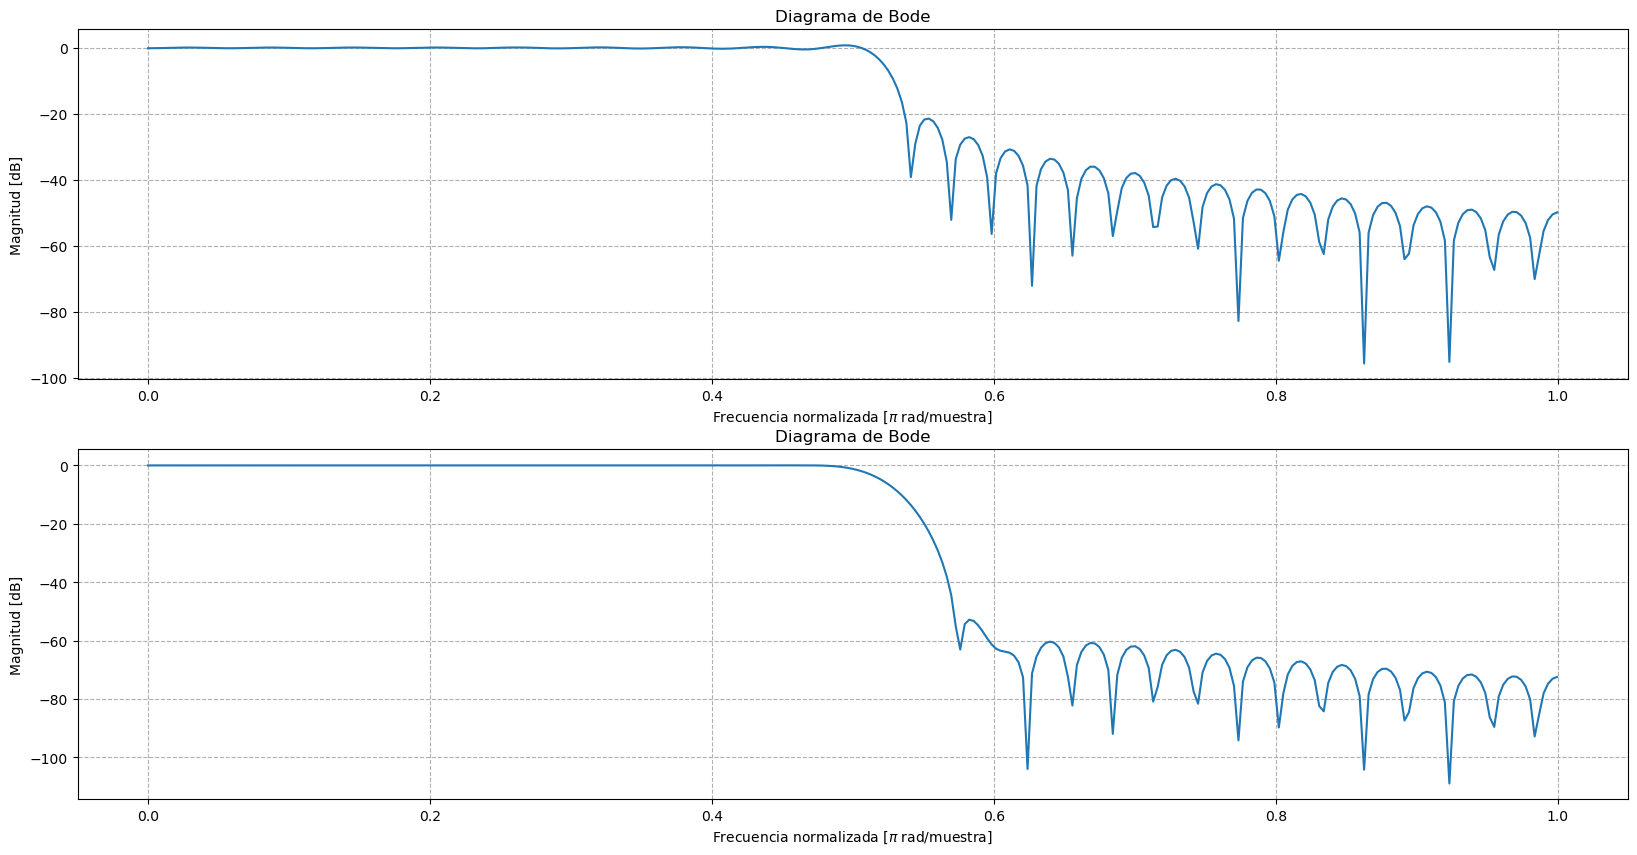

In [15]:
# con ventana rectangular
Lh=69
N=Lh-1
n=np.array(range(Lh))
k=(Lh-1)/2
hr=Oc/np.pi*np.sinc(Oc/np.pi*(n-k))

# con ventana de Hamming
win = sig.windows.hamming(Lh)
hwin=(Oc/np.pi*np.sinc(Oc/np.pi*(n-k)))*win

#Respuestas en frecuencias
S1=sig.dlti([hr],[1])
Ome = np.arange(0,np.pi,0.01)
_, Mag_dB1, Fase1 = sig.dbode(S1,w=Ome)
O1=Ome/np.pi
S2=sig.dlti([hwin],[1], dt=0.1)
_, Mag_dB2, Fase2 = sig.dbode(S2,w=Ome)
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
ax1.plot(O1, Mag_dB1) 
ax1.grid(linestyle='--')
ax1.set_title("Diagrama de Bode")
ax1.set_xlabel("Frecuencia normalizada [$\pi$ rad/muestra]")  
ax1.set_ylabel("Magnitud [dB]")
#ax1.set_ylim(-1,1)
#ax1.set_xlim(0.0,0.47)

ax2.plot(O1, Mag_dB2) 
ax2.grid(linestyle='--')
ax2.set_title("Diagrama de Bode")
ax2.set_xlabel("Frecuencia normalizada [$\pi$ rad/muestra]")  
ax2.set_ylabel("Magnitud [dB]")
#ax2.set_ylim(-2.5,2.5)
#ax2.set_xlim(0.0,0.25)

## Pasa Banda BP

In [16]:
#Parametros del filtro
fs=4200
fa1=400
fa2=1700
fp1=500
fp2=1500
rp=20*np.log10(1.1)
Aa=20*np.log10(1/400)
Op1=fp1/fs*2*np.pi
Op2=fp2/fs*2*np.pi
Oa1=fa1/fs*2*np.pi
Oa2=fa2/fs*2*np.pi
Oc1=(Op1+Oa1)/2
Oc2=(Op2+Oa2)/2

Ome0=(Oc1+Oc2)/2

print('PARAMETROS DEL FILTRO')
print('Atenuación=',round(Aa,2))
print('Omega de paso 1=',round(Op1,2))
print('Omega de paso 1=',round(Op1/np.pi,2))
print('Omega de paso 2=',round(Op2,2))
print('Omega de paso 2=',round(Op2/np.pi,2))
print('Omega de rechazo 1=',round(Oa1,2))
print('Omega de rechazo 1=',round(Oa1/np.pi,2))
print('Omega de rechazo 2=',round(Oa2,2))
print('Omega de rechazo 2=',round(Oa2/np.pi,2))
print('Ripple=',round(rp,3))
print('Banda de transición 1=',round((Op1-Oa1),2))
print('Banda de transición 1=',round((Op1-Oa1)/np.pi,2))
print('Banda de transiciónv 2=',round((Oa2-Op2),2))
print('Banda de transición 2=',round((Oa2-Op2)/np.pi,2))
print('Omega de corte 1=',round(Oc1,2))
print('Omega de corte 1=',round(Oc1/(np.pi),2))
print('Omega de corte 2=',round(Oc2,2))
print('Omega de corte 2=',round(Oc2/(np.pi),2))
print('Omega cero=',round(Ome0,2))
print('Omega cero=',round(Ome0/np.pi,2)) 

PARAMETROS DEL FILTRO
Atenuación= -52.04
Omega de paso 1= 0.75
Omega de paso 1= 0.24
Omega de paso 2= 2.24
Omega de paso 2= 0.71
Omega de rechazo 1= 0.6
Omega de rechazo 1= 0.19
Omega de rechazo 2= 2.54
Omega de rechazo 2= 0.81
Ripple= 0.828
Banda de transición 1= 0.15
Banda de transición 1= 0.05
Banda de transiciónv 2= 0.3
Banda de transición 2= 0.1
Omega de corte 1= 0.67
Omega de corte 1= 0.21
Omega de corte 2= 2.39
Omega de corte 2= 0.76
Omega cero= 1.53
Omega cero= 0.49


### Construimos el filtro

Text(0, 0.5, 'Magnitud [dB]')

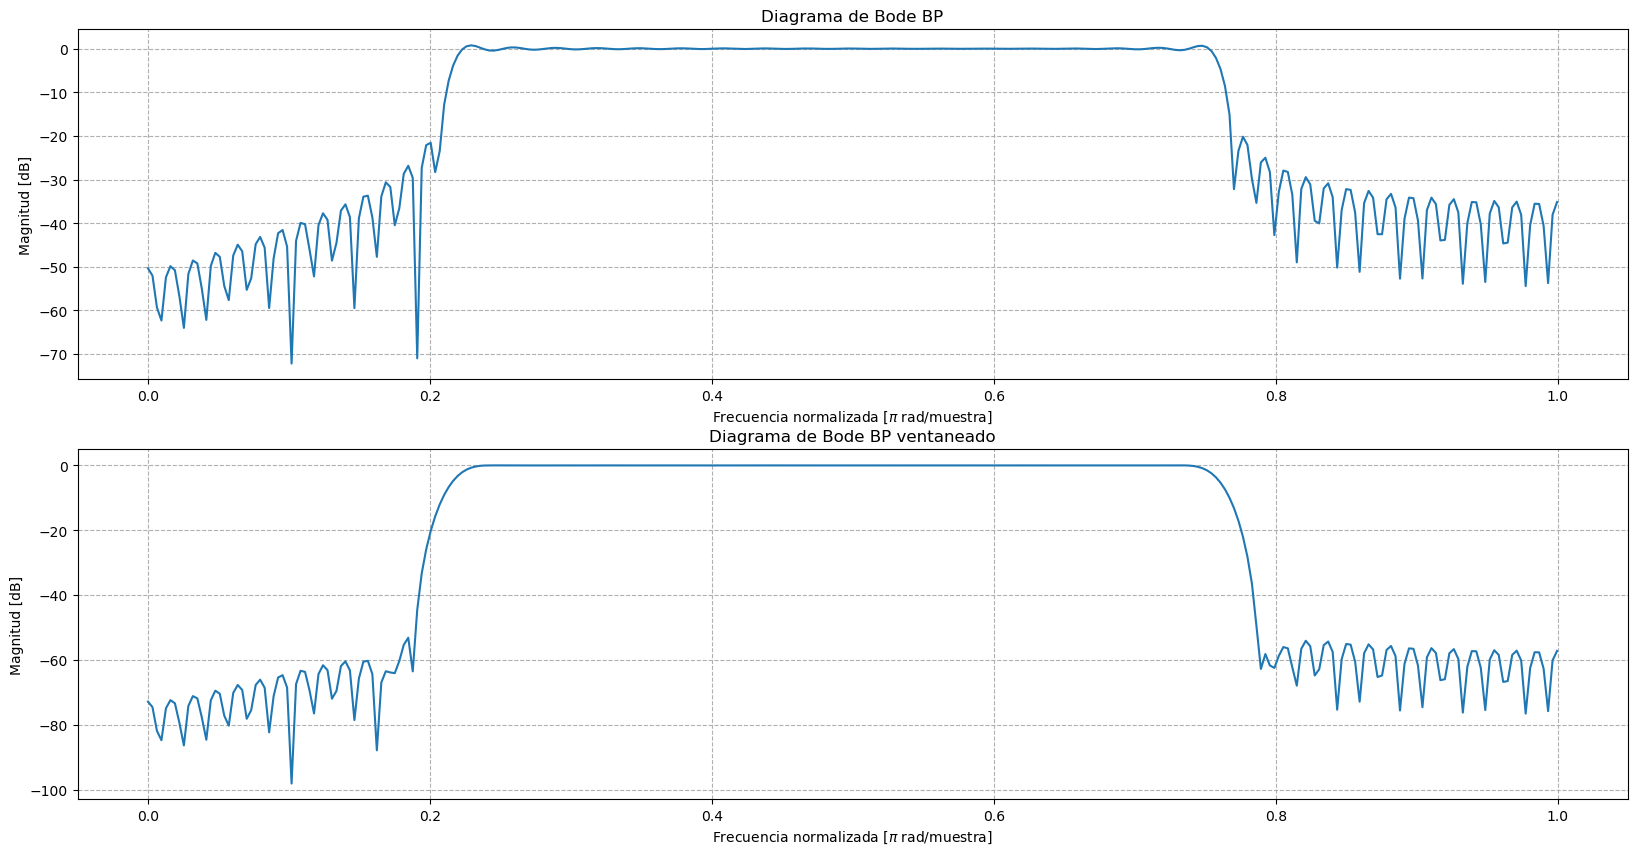

In [19]:
# con ventana rectangular
Lh=135
N=Lh-1
n=np.array(range(Lh))
Oc=(Oc2-Oc1)/2
k=(Lh-1)/2
hbpr=2*Oc/np.pi*np.sinc(Oc/np.pi*(n-k))*np.cos(Ome0*(n-k))

# con ventana de Hamming
win1 = sig.windows.hamming(Lh)
hwin1=(2*Oc/np.pi*np.sinc(Oc/np.pi*(n-k))*np.cos(Ome0*(n-k)))*win1

# Respuestas en frecuencias
S3=sig.dlti([hbpr],[1], dt=0.1)
Ome = np.arange(0,np.pi,0.01)
_, Mag_dB3, Fase3 = sig.dbode(S3,w=Ome)
O1=Ome/np.pi
S4=sig.dlti([hwin1],[1])
_, Mag_dB4, Fase4 = sig.dbode(S4,w=Ome)
fig2, (ax3, ax4) = plt.subplots(2, 1, figsize=(20, 10))
ax3.plot(O1, Mag_dB3) 
ax3.grid(linestyle='--')
ax3.set_title("Diagrama de Bode BP")
ax3.set_xlabel("Frecuencia normalizada [$\pi$ rad/muestra]")  
ax3.set_ylabel("Magnitud [dB]")
#ax3.set_ylim(-1,1)
#ax3.set_xlim(0.0,0.47)

ax4.plot(O1, Mag_dB4) 
ax4.grid(linestyle='--')
ax4.set_title("Diagrama de Bode BP ventaneado")
ax4.set_xlabel("Frecuencia normalizada [$\pi$ rad/muestra]")  
ax4.set_ylabel("Magnitud [dB]")
#ax2.set_ylim(-2.5,2.5)
#ax2.set_xlim(0.0,0.25)

## Pasa Altos HP

In [20]:
#Parametros del filtro
fs=4200
fa=1400
fp=1500
rp=20*np.log10(1.1)
Aa=20*np.log10(1/400)
Op=fp/fs*2*np.pi
Oa=fa/fs*2*np.pi
Oc1=(Op+Oa)/2
Ome0=np.pi

print('PARAMETROS DEL FILTRO')
print('Atenuación=',round(Aa,2))
print('Omega de paso =',round(Op,2))
print('Omega de paso =',round(Op/np.pi,2))
print('Omega de rechazo =',round(Oa,2))
print('Omega de rechazo =',round(Oa/np.pi,2))
print('Ripple=',round(rp,3))
print('Banda de transición =',round((Op-Oa),2))
print('Banda de transición =',round((Op-Oa)/np.pi,2))
print('Omega de corte =',round(Oc1,2))
print('Omega de corte =',round(Oc1/(np.pi),2))
print('Omega cero=',round(Ome0,2))
print('Omega cero=',round(Ome0/np.pi,2)) 

PARAMETROS DEL FILTRO
Atenuación= -52.04
Omega de paso = 2.24
Omega de paso = 0.71
Omega de rechazo = 2.09
Omega de rechazo = 0.67
Ripple= 0.828
Banda de transición = 0.15
Banda de transición = 0.05
Omega de corte = 2.17
Omega de corte = 0.69
Omega cero= 3.14
Omega cero= 1.0


Text(0, 0.5, 'Magnitud [dB]')

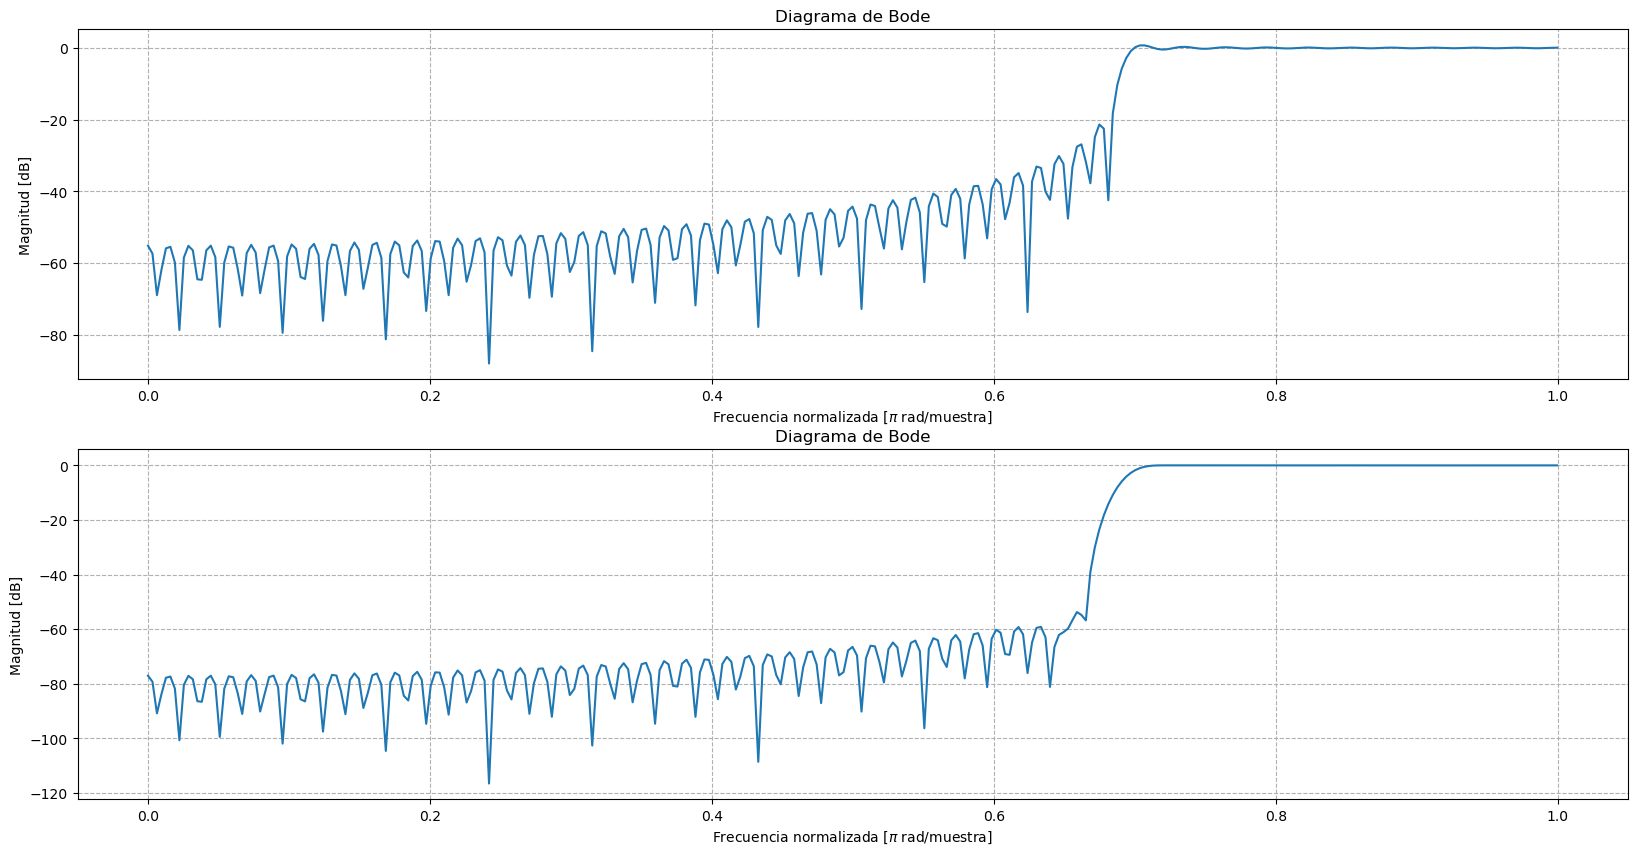

In [21]:
# con ventana rectangular
Lh=135
N=Lh-1
n=np.array(range(Lh))
Oc=(np.pi-Oc1)
k=(Lh-1)/2
hhpr=Oc/np.pi*np.sinc(Oc/np.pi*(n-k))*np.cos(Ome0*(n+k))

# con ventana de Hamming
win2 = sig.windows.hamming(Lh)
hwin2=(Oc/np.pi*np.sinc(Oc/np.pi*(n-k))*np.cos(Ome0*(n-k)))*win2

# Respuestas en frecuencias
S3=sig.dlti([hhpr],[1], dt=0.1)
Ome = np.arange(0,np.pi,0.01)
_, Mag_dB5, Fase5 = sig.dbode(S3,w=Ome)
O1=Ome/np.pi
S4=sig.dlti([hwin2],[1])
_, Mag_dB6, Fase6 = sig.dbode(S4,w=Ome)
fig2, (ax5, ax6) = plt.subplots(2, 1, figsize=(20, 10))
ax5.plot(O1, Mag_dB5) 
ax5.grid(linestyle='--')
ax5.set_title("Diagrama de Bode")
ax5.set_xlabel("Frecuencia normalizada [$\pi$ rad/muestra]")  
ax5.set_ylabel("Magnitud [dB]")
#ax5.set_ylim(-1,1)
#ax5.set_xlim(0.0,0.47)

ax6.plot(O1, Mag_dB6) 
ax6.grid(linestyle='--')
ax6.set_title("Diagrama de Bode")
ax6.set_xlabel("Frecuencia normalizada [$\pi$ rad/muestra]")  
ax6.set_ylabel("Magnitud [dB]")
#ax6.set_ylim(-2.5,2.5)
#ax6.set_xlim(0.0,0.25)